In [ ]:
# First upload the cocktails_data.csv

In [ ]:
import pandas as pd 
import random
from skimage import io
import matplotlib.pyplot as plt

df = pd.read_csv("cocktails_data.csv")
df.index = df.Drink
cocktails_dict = df.to_dict('index')

def print_recipe(cocktail_name):
    ingredients =[v for k,v in cocktails_dict[cocktail_name].items() if ('Ingredient' in k and not pd.isna(v))]
    measures=[v for k,v in cocktails_dict[cocktail_name].items() if ('Measure' in k)]
    instuctions=cocktails_dict[cocktail_name]['Instuctions']
    glass=cocktails_dict[cocktail_name]['Glass']
    thumb=cocktails_dict[cocktail_name]['DrinkThumb']
    print(f'To prepare {cocktail_name} use the following ingredients:\n')

    for i in range(len(ingredients)):
        print(f'{ingredients[i]:<35} {measures[i]:<20}')

    print(f'\n{instuctions}')
    print(f'\nRecommended glass: {glass}')

    plt.rcParams["figure.figsize"] = [3.50, 3.50]  #Set the figure size
    plt.rcParams["figure.autolayout"] = True
    a = io.imread(thumb)
    plt.imshow(a)
    plt.axis('off')
    plt.show()


def random_recipe(search_id=None,dict_name=cocktails_dict):
    if search_id!=None:
        for k,v in dict_name.items():
            if v['id']==search_id:
              print_recipe(k)
    if search_id==None:
        search_id=random.randint(0,len(dict_name)-1)
        for k,v in dict_name.items():
            if v['id']==search_id:
                print_recipe(k)

In [ ]:
#Question 1
# the function showing the first question- returns the name of the chosen alcoholic drink
def question_1(drinks_list):   
    print ('Lets make a cocktail :) >- \n which booze do you have? \n you can chose one \n')
    for i in range(len(drinks_list)):
        print (f' {i+1}) {drinks_list[i]} ')
    print(' 0) I dont have any of these, show me others!')
    choice=input('\nChoose a number:')
    if choice == '0':
        return 0
    else:
        return drinks_list[int(choice)-1]

#Question 2
# the function showing the second question- returns the list of ingrediants (indication numbers) the user have at home
def question_2(ingrediants_list):   
    print ('\n \n OK !! \n so which of the following can you put your hands on?? \n')
    for n in range(int(len(ingrediants_list)/4)):
        i= (n*4)
        print (f' {i+1:<2}) {ingrediants_list[i]:<30} {i+2:<2}) {ingrediants_list[i+1]:<30} {i+3:<2}) {ingrediants_list[i+2]:<30} {i+4:<2}) {ingrediants_list[i+3]:<30}')

    
    choice=input('\n Be kind and write your availabe ingridiants numbers with space separation \n')
    chosen_ingrediants= [ingrediants_list[int(i)-1] for i in choice.split()]
    return chosen_ingrediants
        #return ingrediants_list[int(choice)-1]

# function that return a list of seven most frequant alcoholic drinks, to preset in Q1
def seven_drinks ():
    #list of the all the ingredients in the dictionary:
    all_ingredients=[]
    for cocktail in cocktails_dict.values():
        ingredients =[v for k,v in cocktail.items() if ('Ingredient'in k and not pd.isna(v))]
        all_ingredients= all_ingredients+ ingredients
    #print(all_ingredients)

    #list of the the alcoholic drink
    ingredients_set= set([cocktail['Ingredient1'] for cocktail in cocktails_dict.values()])
    non_alcohol_ingrediants_set=set( ['Water', 'Grenadine','Advocaat','Angelica root','Apple juice', "Bailey's irish cream",'Berries','Bitters','Cantaloupe','Carbonated water',
                                'Chocolate','Chocolate ice-cream','Chocolate syrup', 'Coca-Cola','Cocoa powder','Coffee','Cognac','Cranberries','Cranberry juice',
                                'Creme de Cacao','Creme de Cassis','Egg','Egg yolk','Espresso','Ginger','Grape juice','Grapefruit juice','Grapes','Heavy cream',
                                'Hot Damn','Ice','Kiwi','Lemon','Lemon juice', 'Lemon peel','Lemonade','Lime','Lime juice', 'Mango', 'Milk','Mint','Orange','Orange juice',
                                'Peach nectar','Pineapple juice','Strawberries','Sugar','Sugar syrup','Tea','Tomato juice','Vanilla Ice-Cream','Vanilla ice-cream','Yoghurt' ,'Yukon Jack'
    ])
    alochol_ingrediants= ingredients_set - non_alcohol_ingrediants_set
    # alochol_ingrediants

    # removing the non-alcoholic drinks from the list of all_ingreduents:
    sorted_alcohol= [ingredient for ingredient in all_ingredients if ingredient in alochol_ingrediants ]
    #print(sorted_alcohol)

    # sorting the alcoholic list by by frequency and remove duplicates
    from collections import Counter
    frequent_alcohol = [key for key, value in Counter(sorted_alcohol).most_common()]
    seven_most_frequent= frequent_alcohol[0:7]
    second_most_frequent=frequent_alcohol[8:14]
    third_most_frequent=frequent_alcohol[14:21]

    return(seven_most_frequent)


# sorting the list of optional drinks by the first ingredient that we choose:
def filter_cocktails(chosen_ingredient):
    relevant_cocktails={}
    for cocktailname,cocktaildis in cocktails_dict.items():
        for value in cocktaildis.values():
            if chosen_ingredient == value:
                relevant_cocktails[cocktailname]= cocktaildis        
    #print(relevant_cocktails)
    
    return  relevant_cocktails   


# function sorting the 20 most frequent ingredients for the chosen relevant cocktail dictionary - as list for Q2
#input- relevant_cocktails dictionary that contains only the cocktails that have the chosen drink
def get_20_ingredatiants(relevant_cocktails,chosen_ingredient):
    all_relevant_ingrediants =[]
    for cocktail in relevant_cocktails.values():
        relevant_ingredients =[v for k,v in cocktail.items() if ('Ingredient' in k and not pd.isna(v) and not v==chosen_ingredient and not v=='Water')]
        all_relevant_ingrediants =all_relevant_ingrediants + relevant_ingredients
    #print(all_relevant_ingrediants)
    len(all_relevant_ingrediants)

    from collections import Counter
    frequent_ingrediants = [key for key, value in Counter(all_relevant_ingrediants).most_common()]
    most_frequent_ingrediants= frequent_ingrediants[0:20]
    return most_frequent_ingrediants


# comparing the set of the chosen ingredients to the relevant_cocktail dictionary 
# you get a dictionary(substraction) included: 
# key: name of the cocktail,    values: the ingrident that left for preparing the cocktail and you dont have
#input: ingredients_you_have - list of the ingredient that you have at your home

def decide_cocktail(chosen_ingrediants, relevant_cocktails,chosen_drink):
    
    substraction={} 
    for cocktailname,values in relevant_cocktails.items():
        additional_ingredients =[v for k,v in values.items() if ('Ingredient' in k and not pd.isna(v) and not v==chosen_drink and not v=='Water')]
        commen_ingredients= set(additional_ingredients)-set(chosen_ingrediants)
        substraction[cocktailname]=commen_ingredients
    # for the dictinary (substraction):finding the first (!!) cocktail with minimum ingredient to buy.
    # moreover, you get the ingredients that you still need to buy, or its tell you you have everything
    best_cocktail = min(substraction, key=substraction.get)

    if len(substraction[best_cocktail])>0: answer= f'you need to buy:\n {substraction[best_cocktail]}'
    else: answer= 'you have everything you need'

    return best_cocktail, answer


# calling question function to make first drink choise
def choosing_by_ingrediants():
    drinks_list=seven_drinks ()
    chosen_drink= question_1(drinks_list)
    print(f'{chosen_drink} \n')
    relevant_cocktails= filter_cocktails(chosen_drink)
    ingrediants_list=get_20_ingredatiants(relevant_cocktails,chosen_drink)
    chosen_ingrediants=question_2(ingrediants_list)
    best_cocktail, answer = decide_cocktail(chosen_ingrediants, relevant_cocktails,chosen_drink)
    print (f'\n Great! you can make: {best_cocktail} \n')
    print(f'{answer} \n \n')
    print_recipe(best_cocktail)


In [ ]:
class Quiz:
     def __init__(self, prompt, answer):
          self.prompt = prompt
          self.answer = answer

#random 4 cocktail ids from list
cocktails_ids=random.sample(range(0, len(cocktails_dict)-1), 4)
# print(coctails_ids)

#name of cocktails
cocktails_list=[]
for i in cocktails_ids:
    for k,v in cocktails_dict.items():
        if v['id']==i:
            cocktails_list.append(k)
# print(cocktails_list)

#random currect answer
random_cocktail_name=cocktails_list[random.randint(0,3)]
# print('random_cocktail_name=='+random_cocktail_name)

Currect_answer=[v for k,v in cocktails_dict[random_cocktail_name].items() if ('Ingredient' in k and not pd.isna(v))]
# print(Currect_answer)


ingredients_list =[]
for c_name in cocktails_list: 
    ing=[v for k,v in cocktails_dict[c_name].items() if ('Ingredient' in k and not pd.isna(v))]
    ingredients_list.append(ing)
# print(ingredients_list)

question_prompts = [
     "Which of the following ingridients are used for mixing " +random_cocktail_name+"?\n(1) "+str(ingredients_list[0])+"\n(2) "+str(ingredients_list[1])+"\n(3) "+str(ingredients_list[2])+"\n(4) "+str(ingredients_list[3]),
     "Is it 5 oclock already ?\n(1) who cares?\n(2) I'm not drinking regardless"
     ]
# print(question_prompts)

Currect_answer_idx=cocktails_list.index(str(random_cocktail_name))+1

questions = [
     Quiz(question_prompts[0], str(Currect_answer_idx)),
     Quiz(question_prompts[1], '1'),
]

def run_quiz(questions):
    score = 0
    for Quiz in questions:
        answer = input(Quiz.prompt+'\nChoose a number:')
        if answer == Quiz.answer:
            print('That is currect!\n')
            score += 1
        if answer != Quiz.answer:
            print('NO!, did someone drink too much?\n')
    print("you got", score, "out of", len(questions))

# print(Currect_answer)
# print(Currect_answer_idx)
# run_quiz(questions)

In [ ]:
def category_filter():
  

  category_filt = 'X'
  while category_filt.lower() not in 'cocktail shot beer':
      category_filt = input('What are you in the mood for: \n Cocktail \n Shot \n Beer \n')
      if category_filt.lower() in 'cocktail shot beer':
          break
      else:
          print("We don't have this drink... Plz choose:  cocktail , shot, or beer ")

  category_filt_capi = (category_filt.capitalize())

  dict_b = {}
  for i,j in cocktails_dict.items():
    for x, y in j.items(): #nested
      if y==category_filt_capi:
        dict_b[i] = j
  # print(dict_b)
  # print(len(dict_b))

  if category_filt_capi == 'Beer':

    category_filt2 = 'X'
    while category_filt2.lower() not in 'lager ale cider':
        category_filt2 = input('What kind of Beer? \n Lager  \n Ale \n Cider \n')
        if category_filt2.lower() in 'lager ale cider':
            break
        else:
            print("We don't have this drink... Plz choose: Lager ale Cider ")
    category_filt_capi2 = (category_filt2.capitalize())
     
    list_c = []
    for n,m in dict_b.items():
      for i, j in m.items(): #nested
        if j==category_filt_capi2:
          list_c.append(n)
    # print(list_c)
    print('\n\nI think you will love this!\n')
    random_cocktail_in_list_c=list_c[random.randint(0,len(list_c)-1)]
    print_recipe(random_cocktail_in_list_c)


  if category_filt_capi == 'Shot':

    category_filt2 = 'X'
    while category_filt2.lower() not in 'vodka  irish cream whiskey':
        category_filt2 = input('What do you prefer? \n Vodka  \n Irish cream \n Whiskey \n')
        if category_filt2.lower() in 'vodka  irish cream whiskey':
            break
        else:
            print("We don't have this drink... Plz choose: Vodka  Irish cream Whiskey ")
    category_filt_capi2 = (category_filt2.capitalize())
  
    list_c = []
    for n,m in dict_b.items():
      for i, j in m.items(): #nested
        if j==category_filt_capi2:
          list_c.append(n)
    # print(list_c)
    print('\n\nI think you will love this!\n')
    random_cocktail_in_list_c=list_c[random.randint(0,len(list_c)-1)]
    print_recipe(random_cocktail_in_list_c)



  if category_filt_capi == 'Cocktail':

    category_filt2 = 'X'
    while category_filt2.lower() not in 'lemon   orange cranberry  ':
        category_filt2 = input('Which fruit do you prefer? \n Lemon   \n Orange  \n Cranberry  \n')
        if category_filt2.lower() in 'lemon orange cranberry':
            break
        else:
            print("We don't have this drink... Plz choose: lemon orange cranberry ")
    category_filt_capi2 = (category_filt2.capitalize())
  
    list_c = []
    for n,m in dict_b.items():
      for i, j in m.items(): #nested
        if j==category_filt_capi2:
          list_c.append(n)
    # print(list_c)
    print('\n\nI think you will love this!\n')
    random_cocktail_in_list_c=list_c[random.randint(0,len(list_c)-1)]
    print_recipe(random_cocktail_in_list_c)

  


In [ ]:
def specific_recipe(name=None):

    search_key =input('Write down any partial cocktail name:\t')
    search_result = [k for k,v in cocktails_dict.items() if search_key.lower() in k.lower()]
    if len(search_result)==0:
      print('Lets try again\n')
      specific_recipe()
    # printing result 
    found_options=print("\nDid you mean any of these:\n\n" + str(search_result))
    liked=input( 'Y/N\t')
    yes=['y','Y','yes','Yes','YES']
    no=['n','N','no','No','NO']
    if liked in yes:
        customer_wants=input('So which one was it? I need the full name please: ')
        print('\nhere you go!\n\n')
        print_recipe(customer_wants)
    if liked in no:
        print('O.k. better luck next time.\n')
        main_menu()

In [ ]:
def main_menu():
    features='''
    1) You know what SURPRISE ME!
    2) What do you Recommend?
    3) I Have these on me but I have no idea what to do with them?!
    4) I bet I know my cocktails better than you.
    5) I'm not sure I remember the name of the cocktail.
    6) Just leave me alone!
    '''

    print('Hi again! what can I get you? ')
    choice=input(features+'\nChoose a number:')
    if choice =='1':
        random_recipe()
    if choice =='2':
        category_filter()
    if choice =='3':
        choosing_by_ingrediants()
    if choice =='4':
        print("Oh really? let's test that!\n\n")
        run_quiz(questions)
    if choice =='5':
        specific_recipe()
    if choice =='6':
        print('You just broke my heart!')


Hi again! what can I get you? 

    1) You know what SURPRISE ME!
    2) What do you Recommend?
    3) I Have these on me but I have no idea what to do with them?!
    4) I bet I know my cocktails better than you.
    5) I'm not sure I remember the name of the cocktail.
    6) Just leave me alone!
    
Choose a number:1
To prepare A1 use the following ingredients:

Gin                                 1 3/4 shot          
Grand Marnier                       1 Shot              
Lemon Juice                         1/4 Shot            
Grenadine                           1/8 Shot            

Pour all ingredients into a cocktail shaker, mix and serve over ice into a chilled glass.

Recommended glass: Cocktail glass


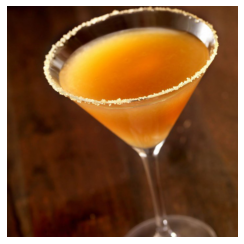

In [ ]:
main_menu()